##SVM stroje 

SVM (Support vector machines) jsou rodina modelů učení s učitelem

Požívají se pro klasifikaci, regresi (a detekci ouliers)

Jejich výhody:

- Efektivita pro hodně dimenzionální vstupy (zvlášť s kernelovým trikem)
- Použitelnost i v úlohách, kde dimenze vstupu je větši než počet vzorů
- V modelu SVM se použijí data z trénovací množiny
- Takže je výsledný model je relativně malý 
- Použití různých kernelů umožňuje práci s různými daty, i hodně heterogenní povahy

Nevýhody:

- Když je dimenze moc velká (vzhledem k počtu dat), nemají dobré výsledky (ale to skoro žádný model, kromě specializovaných statistických přístupů)
- Neposkytují odhady pravděpodobnosti (při klasifikaci)

Princip:

SVM hledá nadrovinu (více nadrovin), kterou použije při klasifikaci nebo regresi. Intuitivně při binární klasifikaci hledáme separující nadrovinu tříd (obdobně jako perceptron). 

SVM hledá nadrovinu tak, že maximalizuje vzdálenosti nadroviny od nejbližších datových bodů ze tříd (funkční margin), (t.j. úplně jinak než perceptron).

![svm](svm.png)

###Algoritmus pro binární klasifikátor SVM:

Trénovací množina $x_i \in \mathbb{R}^p, i=1,..., n,$ reprezentující dvě třídy $y \in \{1, -1\}^n$, SVM řeší úlohu:
$$\min_ {w, b, \zeta} \frac{1}{2} w^T w + C \sum_{i=1}^{n} \zeta_i$$
vzhledem k  $$y_i (w^T \phi (x_i) + b) \geq 1 - \zeta_i,$$
$$\zeta_i \geq 0, i=1, ..., n$$
Duální úloha je:
$$\min_{\alpha} \frac{1}{2} \alpha^T Q \alpha - e^T \alpha$$
vzhledem k  $$y^T \alpha = 0$$
$$0 \leq \alpha_i \leq C, i=1, ..., n$$

kde $e$ je jednotkový vektor, $C > 0$ horní mez, $Q$ je nxn pozitivně semidefinitní matice $Q_{ij} \equiv K(x_i, x_j) = \phi (x_i)^T \phi (x_j)$ je kernel. 

Takže vstupní vektory jsou zobrazeny do prostoru s vyšší dimenzí pomocí funkce $\phi$.

Výsledná rozhodovací funkce je:
$$\operatorname{sgn}(\sum_{i=1}^n y_i \alpha_i K(x_i, x) + \rho)$$



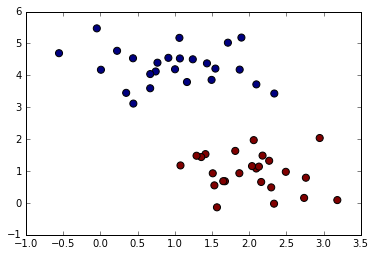

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);

def plot_svc_decision_function(clf):
    """Plot the decision function for a 2D SVC"""
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([xi, yj])
    return plt.contour(X, Y, P, colors='k',
                       levels=[-1, 0, 1],
                       linestyles=['--', '-', '--'])



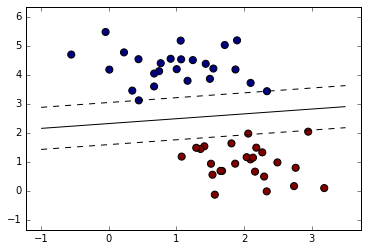

In [15]:
%%capture --no-display --no-stdout cap

from sklearn.svm import SVC # "Support Vector Classifier"
clf = SVC(kernel='linear')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(clf);

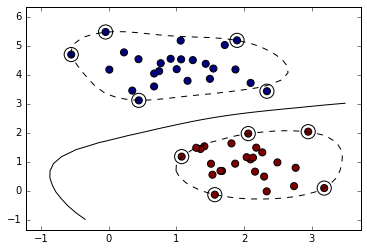

In [16]:
%%capture --no-display --no-stdout cap

clf = SVC(kernel='rbf')
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

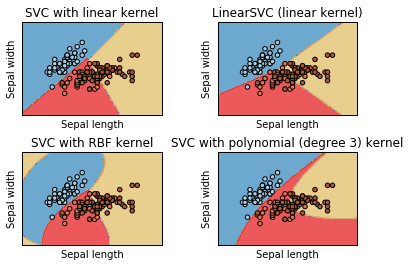